<a href="https://colab.research.google.com/github/asmeen196/analysisofpoliticalsentiment/blob/main/Analysis_of_political_sentiment_on_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Twitter API credentials
APIKey = 'kbOFMS3lWIXD3ULMG1MjBrJbg'
APIKeySecret = 'o3O2arMpkCF5Z4vBXqPtls5DO1uVOx0LUITXzMTK1BHAe2Qa1T'
AccessToken = '1324214742924185600-hBnD2wOL2gO78ep4Ggog4lPsvDzO0o'
AccessTokenSecret = 'BaiBvpfqxELLy6Z712OfJwALJHXT8aXABib85AlSCMIQx' 

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(APIKey, APIKeySecret)

#Set the access token and access token secret
authenticate.set_access_token(AccessToken, AccessTokenSecret)

#Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [ ]:
#Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "BillGates", count= 100, lang = "en", tweet_mode="extended")

#Print the last 5 tweets from the account
print("Show the 5 recent tweets:\n")
i =1
for tweet in posts[0:5]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i = i + 1



Show the 5 recent tweets:

1) Should you pick your nose?

You can read an excerpt from Matt Richtel’s fascinating book about the immune system on my blog to find the answer: https://t.co/cgfc1aUzPA https://t.co/Uc7vqT2B1m

2) The journalist @ElizKolbert has created a fascinating beat for herself covering humanity’s impact on nature and our attempts to control it. Her latest book is a good reminder that we need to watch out for the unforeseen effects of our actions. https://t.co/8gt4I8oxXc

3) The persistence of countless Rotarians gives me hope that we can achieve a polio-free world. As they close the #Rotary21 Convention, I'd like to thank @Rotary for the continued partnership to #endpolio. https://t.co/sZ4dRiuiXk

4) I'm almost always interested in books about American presidents, and I especially loved A Promised Land. It’s a fascinating look at what it’s like to steer a country through challenging times. https://t.co/RgpXbkOnDw

5) This book gave me a deeper, more nuanced appreciat

In [ ]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,Should you pick your nose?\n\nYou can read an ...
1,The journalist @ElizKolbert has created a fasc...
2,The persistence of countless Rotarians gives m...
3,I'm almost always interested in books about Am...
4,"This book gave me a deeper, more nuanced appre..."


In [ ]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)# Removed @mentions
  text = re.sub(r'#', '', text) # Removing the '#' symbol
  text = re.sub('RT[\s]', '', text) #Removing RT
  text = re.sub(r'https?:\/\/S+', '', text) # Remove the hyper link

  return text

df['Tweets']= df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

,Tweets
0,Should you pick your nose?\n\nYou can read an ...
1,The journalist has created a fascinating beat...
2,The persistence of countless Rotarians gives m...
3,I'm almost always interested in books about Am...
4,"This book gave me a deeper, more nuanced appre..."
...,...
95,": In 2020, global health went local. \n\nCOVID..."
96,: Only 3% of Black students learn computer sci...
97,": After being sworn in this morning, I'm honor..."
98,"When it comes to preventing pandemics, scienti..."


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,Should you pick your nose?\n\nYou can read an ...,0.850000,0.700000
1,The journalist has created a fascinating beat...,0.783333,0.633333
2,The persistence of countless Rotarians gives m...,0.500000,0.000000
3,I'm almost always interested in books about Am...,0.670000,0.490000
4,"This book gave me a deeper, more nuanced appre...",0.250000,0.250000
...,...,...,...
95,": In 2020, global health went local. \n\nCOVID...",0.000000,0.000000
96,: Only 3% of Black students learn computer sci...,0.657778,-0.002222
97,": After being sworn in this morning, I'm honor...",0.000000,0.000000
98,"When it comes to preventing pandemics, scienti...",0.321970,0.096591


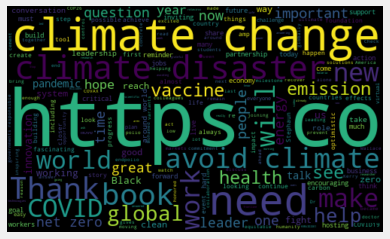

In [ ]:
# Plot the Word Cloud
allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state= 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Should you pick your nose?\n\nYou can read an ...,0.850000,0.700000,Positive
1,The journalist has created a fascinating beat...,0.783333,0.633333,Positive
2,The persistence of countless Rotarians gives m...,0.500000,0.000000,Neutral
3,I'm almost always interested in books about Am...,0.670000,0.490000,Positive
4,"This book gave me a deeper, more nuanced appre...",0.250000,0.250000,Positive
...,...,...,...,...
95,": In 2020, global health went local. \n\nCOVID...",0.000000,0.000000,Neutral
96,: Only 3% of Black students learn computer sci...,0.657778,-0.002222,Negative
97,": After being sworn in this morning, I'm honor...",0.000000,0.000000,Neutral
98,"When it comes to preventing pandemics, scienti...",0.321970,0.096591,Positive


In [ ]:
# Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j+1 

1) Should you pick your nose?

You can read an excerpt from Matt Richtel’s fascinating book about the immune system on my blog to find the answer: https://t.co/cgfc1aUzPA https://t.co/Uc7vqT2B1m

2) The journalist  has created a fascinating beat for herself covering humanity’s impact on nature and our attempts to control it. Her latest book is a good reminder that we need to watch out for the unforeseen effects of our actions. https://t.co/8gt4I8oxXc

3) I'm almost always interested in books about American presidents, and I especially loved A Promised Land. It’s a fascinating look at what it’s like to steer a country through challenging times. https://t.co/RgpXbkOnDw

4) This book gave me a deeper, more nuanced appreciation for the system that is at the core of humanity’s fight against COVID-19 and everything our foundation’s Global Health program is trying to do. https://t.co/uTUH19oKKc

5) If you’re looking for a good book to read this summer, these are some of my favorites. https://

In [ ]:
# print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== 'Negative'):
    print(str(j) + ')'+ sortedDF['Tweets'][i])
    print()
    j=j+1  

1)Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. https://t.co/VIaM9385bv

2)Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. https://t.co/7wqSeT3DJN

3)It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects: https://t.co/XciR3lIVzs https://t.co/Y2do5GhsGx

4): Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

5)For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines t